In [1]:
import os
import sys
import glob
import pickle
sys.path.append('../metanas')

import numpy as np
import pandas as pd

import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from IPython.display import Image, display, Markdown
matplotlib.rcParams['font.serif'] = ['CMU Serif Roman']

In [2]:
def get_experiment_pickle(base_path, path):
    result = []
    path = os.path.join(base_path, path)
    for p in glob.glob(f"{path}/*/experiment.pickle"):
        with (open(p, 'rb')) as f:
            res = pickle.load(f)
            result.append(res)
    
    return result


def mean_std(arr):
    arr = np.array(arr)
    arr = arr * 100
    return np.mean(arr, axis=0), np.std(arr, axis=0)


def plot_accuracy_loss_multiple_seeds(base_path, paths, labels, eval_every,
                                      title="", draw_warm_up=False):
    """Plot all the results in one overview"""

    def plot_line_training(ax, result, indice, label, y_label):
        train_acc = np.array([np.array(m[indice]) for m in result])

        len_epoch = len(np.array(result[0][indice]))
        train_acc_mean = train_acc.mean(axis=0)
        train_acc_std = train_acc.std(axis=0)
        x_axis_meta = np.array(range(train_acc_mean.shape[0]))
        
        ax.plot(x_axis_meta, train_acc_mean, lw = 2, alpha = 1, label=label)
        ax.set_title(f"Meta-training {y_label}")
        ax.fill_between(x_axis_meta, train_acc_mean - train_acc_std,
                        train_acc_mean + train_acc_std, alpha = 0.4)
        ax.set_xlabel("epoch")
        ax.set_ylabel(y_label)
        
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, loc="best")
    
    def plot_line_test(ax, result, indice, label, y_label, eval_every):
        test_spacing = np.linspace(
            eval_every, eval_every*len(result[0][indice]),
            num=len(result[0][indice]), retstep=eval_every,
            dtype=np.int32
        )[0]

        train_acc = np.array([np.array(m[indice]) for m in result])
        len_epoch = len(np.array(result[0][indice]))
        train_acc_mean = train_acc.mean(axis=0)
        train_acc_std = train_acc.std(axis=0)
        
        ax.plot(test_spacing[:len(result[0][indice])],
                train_acc_mean, lw = 2,
                alpha = 1, label=label)
        
        ax.set_title(f"Meta-testing {y_label}")
        ax.fill_between(test_spacing[:len(result[0][indice])],
                        train_acc_mean - train_acc_std,
                        train_acc_mean + train_acc_std, alpha = 0.4)
        ax.set_xlabel("epoch")
        ax.set_ylabel(y_label)
        
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, loc="best")
    
    results = [get_experiment_pickle(base_path, p) for p in paths]
    fig, ax = plt.subplots(2, 2, figsize=(20, 10))
    
    # ax[0].axvline(x=250, color="gray", linestyle="--", label="End of warm up")
    # ax.axvline(x=250, color="gray", linestyle="--", label="End of warm up")
    y_label = ["acurracy", "loss"]
    if draw_warm_up:
        for i, _ in enumerate(results):
            
            for j, _ in enumerate(["train_test_accu", "train_test_loss"]):
                ax[i,j].axvline(x=250, linestyle="dashed", label="Warm-up phase ends", c='gray')
    
    for i, res in enumerate(results):
        if len(res) == 2:
            print(f"current {i} experiment: {labels[i]}")
#             print([res[0]['test_test_accu'][-1], res[1]['test_test_accu'][-1]])
            print(f"test_test_accu, mean and std: {mean_std([res[0]['test_test_accu'][-1], res[1]['test_test_accu'][-1]])}")
            print(f"test_test_accu, mean and std: {mean_std([res[0]['test_test_accu'][-1], res[1]['test_test_accu'][-1]])}")
            print(f"train_test_loss, mean and std: {mean_std([res[0]['train_test_loss'][-1], res[1]['train_test_loss'][-1]])}")
            print(f"train_test_loss, mean and std: {mean_std([res[0]['train_test_loss'][-1], res[1]['train_test_loss'][-1]])}")
        else:
#             print(f"Only one sample available for {names[i]}")
            print(f"current {i} experiment: {labels[i]}")
#             print(f"params: {res[0]['test_test_params'][-1]}")
            print(f"test_test_accu, mean and std: {mean_std([res[0]['test_test_accu'][-1]])}")
            print(f"test_test_accu, mean and std: {mean_std([res[0]['test_test_accu'][-1]])}")
            print(f"train_test_loss, mean and std: {mean_std([res[0]['train_test_loss'][-1]])}")
            print(f"train_test_loss, mean and std: {mean_std([res[0]['train_test_loss'][-1]])}")
        
        
        for j, indice in enumerate(["train_test_accu", "train_test_loss"]):
            plot_line_training(ax[j, 0], res, indice, labels[i], y_label=y_label[j])
        
        for j, indice in enumerate(["test_test_accu", "test_test_loss"]):
            plot_line_test(ax[j, 1], res, indice, labels[i], y_label=y_label[j], eval_every=eval_every[i])

# Ablation plots - Omniglot 1-shot, 20-way
---

### MetaNAS (baseline)

| 1-shot, 20-way Omniglot |   |
|-------------------------|---|
| **Seed 0**              |   |
| Metanas	          | **x** |
| **Seed 1**              |   |
| Metanas  	          | **x** |

current 0 experiment: MetaNAS
test_test_accu, mean and std: (78.18000144660473, 1.1800002664327636)
test_test_accu, mean and std: (78.18000144660473, 1.1800002664327636)
train_test_loss, mean and std: (76.386412627846, 0.9740424381196533)
train_test_loss, mean and std: (76.386412627846, 0.9740424381196533)
current 1 experiment: MetaNAS
test_test_accu, mean and std: (78.46000146567822, 0.900000247359273)
test_test_accu, mean and std: (78.46000146567822, 0.900000247359273)
train_test_loss, mean and std: (75.22979692012072, 2.130658145844933)
train_test_loss, mean and std: (75.22979692012072, 2.130658145844933)


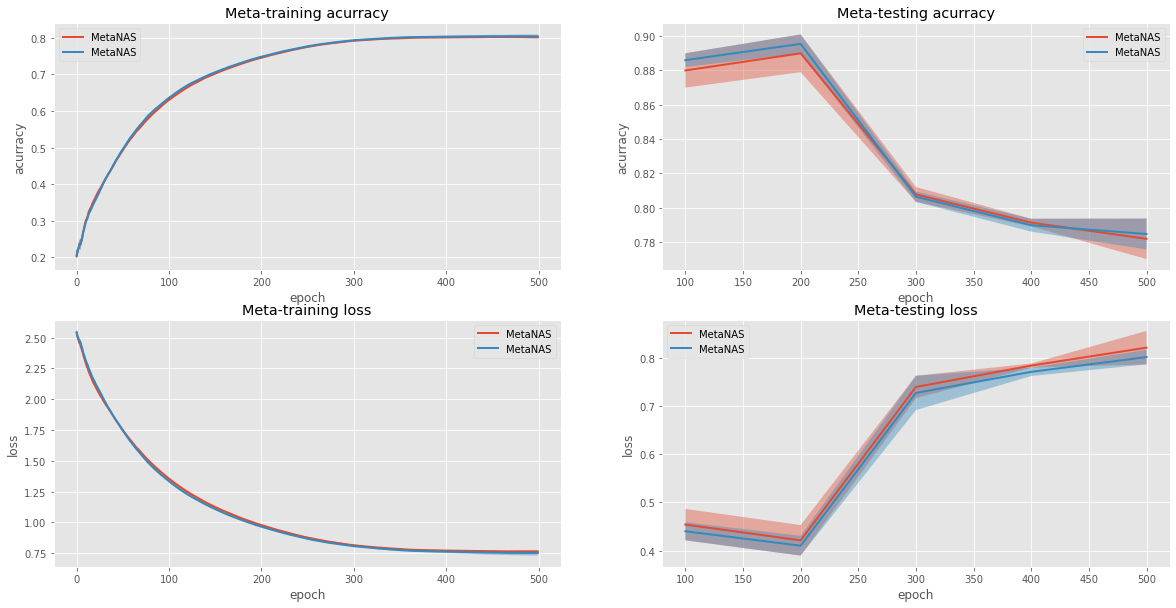

In [19]:
base_path = "/home/rob/Desktop/results/ablation"

paths = [
    "omniglot_train_metanas",
    "omniglot_train_metanas_w_param",
]

names = [
    "MetaNAS",
    "MetaNAS",
]

plot_accuracy_loss_multiple_seeds(base_path, paths, names, eval_every=[100, 100],
                   title="Ablation study, n=1, k=20, Omniglot dataset")

### MetaNAS + TSE

| 1-shot, 20-way Omniglot |   |
|-------------------------|---|
| **Seed 0**              |   |
| Metanas	          | **x** |
| **Seed 1**              |   |
| Metanas  	          | **x** |

current 0 experiment: MetaNAS+TSE
test_test_accu, mean and std: (89.66000118255616, 0.2200000286102295)
test_test_accu, mean and std: (89.66000118255616, 0.2200000286102295)
train_test_loss, mean and std: (64.22262631822377, 0.5297781608626231)
train_test_loss, mean and std: (64.22262631822377, 0.5297781608626231)
current 1 experiment: MetaNAS
test_test_accu, mean and std: (78.46000146567822, 0.900000247359273)
test_test_accu, mean and std: (78.46000146567822, 0.900000247359273)
train_test_loss, mean and std: (75.22979692012072, 2.130658145844933)
train_test_loss, mean and std: (75.22979692012072, 2.130658145844933)


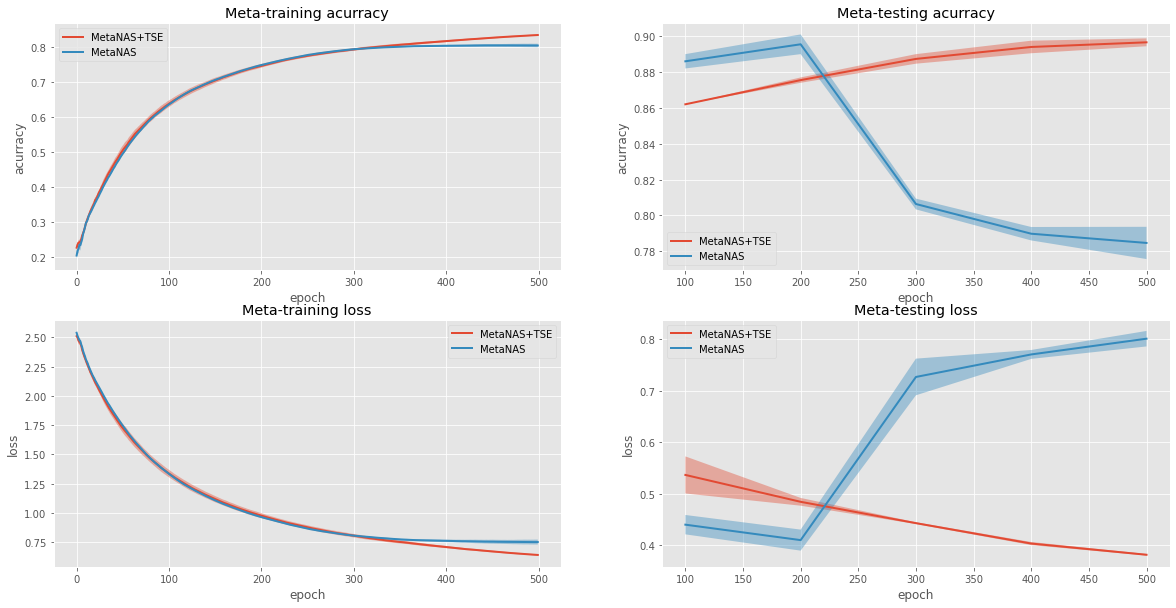

In [20]:
base_path = "/home/rob/Git/meta-fsl-nas/metanas/results/ablation"

paths_sharp = [
    "omniglot_train_metanas_tse",
    "omniglot_train_metanas"
]

names_sharp = [
    "MetaNAS+TSE",
    "MetaNAS",
]

plot_accuracy_loss_multiple_seeds(
    base_path, paths_sharp, names_sharp,
    eval_every=[100, 100, 100, 100, 100, 100, 100],
    title="Ablation sharpDARTS study, n=1, k=20, Omniglot dataset",
    draw_warm_up=False)

### SharpDARTS

| 1-shot, 20-way Omniglot |   |   |   |   |   |   |   |
|-------------------------|---|---|---|---|---|---|---|
| **Seed 0**              |   |   |   |   |   |   |   |
| Alpha Regularization    | x | x | x |   | x |   |   |
| Power Cosine Annealing  | x | x |   | x |   | x |   |
| SharpDARTS Search Space | x |   | x | x |   |   | x |
| **Seed 1**              |   |   |   |   |   |   |   |
| Alpha Regularization    | x | x | x |   | x |   |   |
| Power Cosine Annealing  | x | x |   | x |   | x |   |
| SharpDARTS Search Space | x |   | x | x |   |   | x |


current 0 experiment: MetaNAS
test_test_accu, mean and std: (78.18000144660473, 1.1800002664327636)
test_test_accu, mean and std: (78.18000144660473, 1.1800002664327636)
train_test_loss, mean and std: (76.386412627846, 0.9740424381196533)
train_test_loss, mean and std: (76.386412627846, 0.9740424381196533)
current 1 experiment: SharpDARTS
test_test_accu, mean and std: (74.400001257658, 0.31999992728233906)
test_test_accu, mean and std: (74.400001257658, 0.31999992728233906)
train_test_loss, mean and std: (123.78238378673791, 5.158758100569251)
train_test_loss, mean and std: (123.78238378673791, 5.158758100569251)
current 2 experiment: Alpha Regularization
test_test_accu, mean and std: (79.98000123500825, 0.5400000333786039)
test_test_accu, mean and std: (79.98000123500825, 0.5400000333786039)
train_test_loss, mean and std: (92.41169138774276, 4.177164569348093)
train_test_loss, mean and std: (92.41169138774276, 4.177164569348093)
current 3 experiment: Cosine Power Annealing
test_test_a

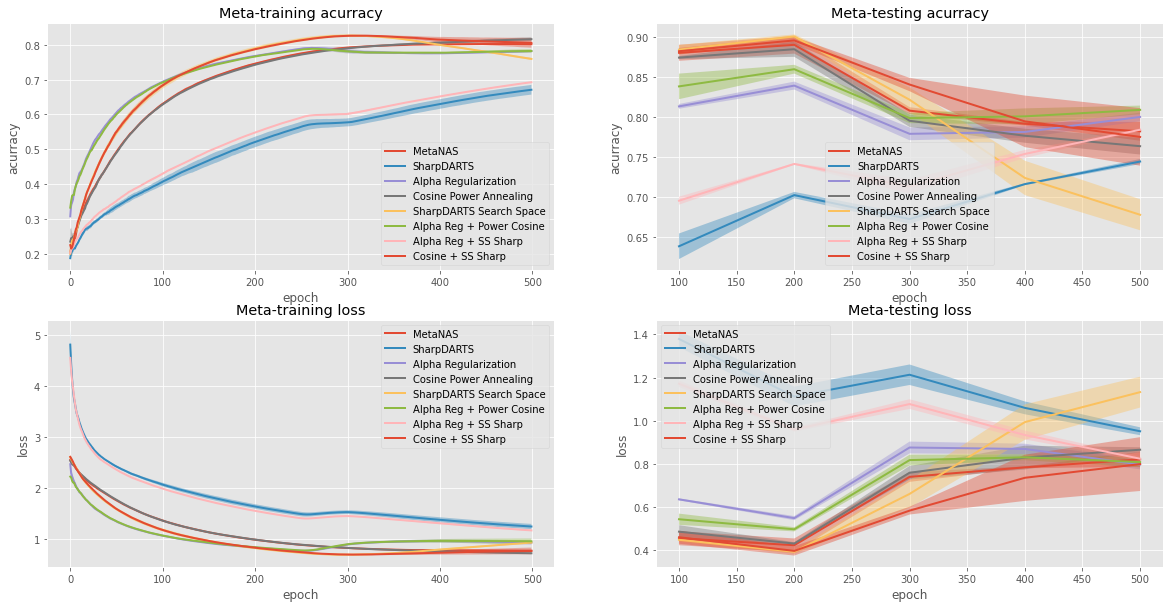

In [21]:
base_path = "/home/rob/Desktop/results/ablation"

paths_sharp = [
    "omniglot_train_metanas",
    "omniglot_train_sharp",
    "omniglot_train_alpha_reg",
    "omniglot_train_power_cosine",
    "omniglot_train_ss_sharp",
    "omniglot_train_alpha_reg_power_cosine",
    "omniglot_train_ss_sharp_alpha_reg",
    "omniglot_train_cos_ss_sharp"
]

names_sharp = [
    "MetaNAS",
    "SharpDARTS",
    "Alpha Regularization",
    "Cosine Power Annealing",
    "SharpDARTS Search Space",
    "Alpha Reg + Power Cosine",
    "Alpha Reg + SS Sharp",
    "Cosine + SS Sharp",
]

plot_accuracy_loss_multiple_seeds(base_path, paths_sharp, names_sharp, eval_every=[100, 100, 100, 100, 100, 100, 100, 100],
                   title="Ablation sharpDARTS study, n=1, k=20, Omniglot dataset", draw_warm_up=False)

### P-DARTS

| 1-shot, 20-way Omniglot      |   |   |   |
|------------------------------|---|---|---|
| **Seed 0**                   |   |   |   |
| Search Space Approximation   | x | x |   |
| Search Space Regularization  | x |   | x |
| **Seed 1**                   |   |   |   |
| Search Space Approximation   | x | x |   |
| Search Space Regularization  | x |   | x |

current 0 experiment: MetaNAS
test_test_accu, mean and std: (78.18000144660473, 1.1800002664327636)
test_test_accu, mean and std: (78.18000144660473, 1.1800002664327636)
train_test_loss, mean and std: (76.386412627846, 0.9740424381196533)
train_test_loss, mean and std: (76.386412627846, 0.9740424381196533)
current 1 experiment: Progressive DARTS
test_test_accu, mean and std: (57.32000082433224, 0.07999996244907237)
test_test_accu, mean and std: (57.32000082433224, 0.07999996244907237)
train_test_loss, mean and std: (76.99522845521568, 0.5639429958164683)
train_test_loss, mean and std: (76.99522845521568, 0.5639429958164683)
current 2 experiment: Search Space Approximation
test_test_accu, mean and std: (54.660001014173034, 1.6600000217556925)
test_test_accu, mean and std: (54.660001014173034, 1.6600000217556925)
train_test_loss, mean and std: (77.81855382680892, 1.3059452456235903)
train_test_loss, mean and std: (77.81855382680892, 1.3059452456235903)
current 3 experiment: Search Space 

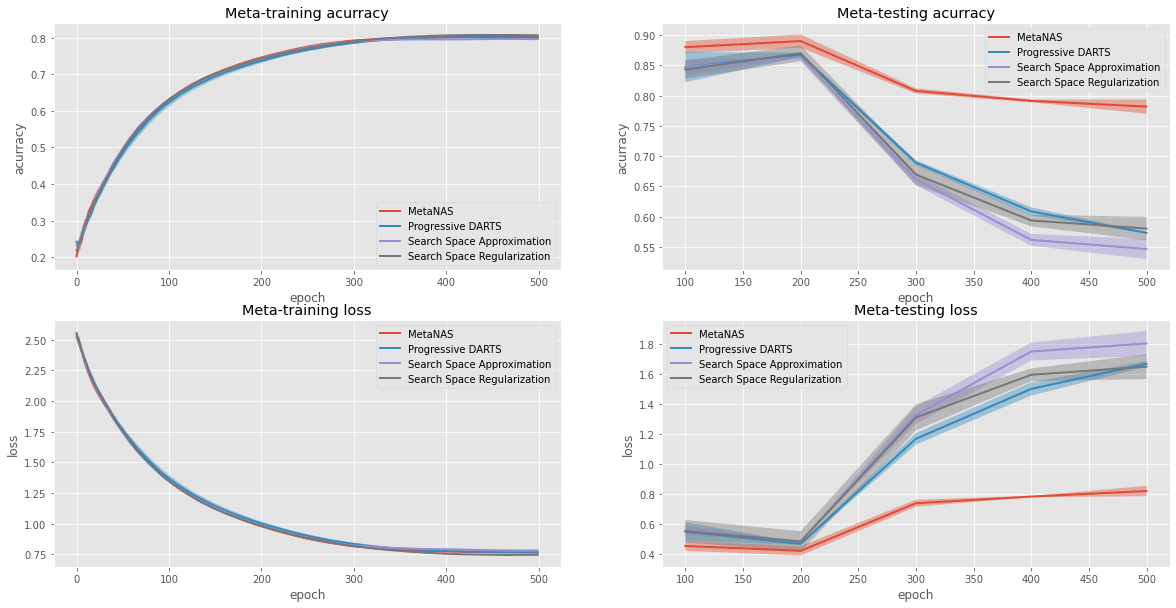

In [12]:
paths = [
    "omniglot_train_metanas",
    "omniglot_train_pdarts",
    "omniglot_train_ssa",
    "omniglot_train_ssr",
]

names = [
    "MetaNAS",
    "Progressive DARTS",
    "Search Space Approximation",
    "Search Space Regularization"
]


plot_accuracy_loss_multiple_seeds(base_path, paths, names, eval_every=[100, 100, 100, 100],
                   title="Ablation P-DARTS study, n=1, k=20, Omniglot dataset")

### Custom adjustments

| 1-shot, 20-way Omniglot |   |   |   |
|-------------------------|---|---|---|
| **Seed 0**              |   |   |   |
| Dropout Skip-connection | x | x |   |
| Limit skip-connection   | x |   | x |
| **Seed 1**              |   |   |   |
| Dropout Skip-connection | x | x |   |
| Limit skip-connection   | x |   | x |

current 0 experiment: MetaNAS Baseline
test_test_accu, mean and std: (78.18000144660473, 1.1800002664327636)
test_test_accu, mean and std: (78.18000144660473, 1.1800002664327636)
train_test_loss, mean and std: (76.386412627846, 0.9740424381196533)
train_test_loss, mean and std: (76.386412627846, 0.9740424381196533)
current 1 experiment: Dropout Skip-Connections
test_test_accu, mean and std: (81.24000136852264, 0.20000007152557941)
test_test_accu, mean and std: (81.24000136852264, 0.20000007152557941)
train_test_loss, mean and std: (75.49640324324369, 0.34630182921886643)
train_test_loss, mean and std: (75.49640324324369, 0.34630182921886643)
current 2 experiment: Limit Skip-Connections
test_test_accu, mean and std: (77.16000113189222, 0.23999997675418427)
test_test_accu, mean and std: (77.16000113189222, 0.23999997675418427)
train_test_loss, mean and std: (76.23699125692248, 1.308382298797369)
train_test_loss, mean and std: (76.23699125692248, 1.308382298797369)
current 3 experiment: L

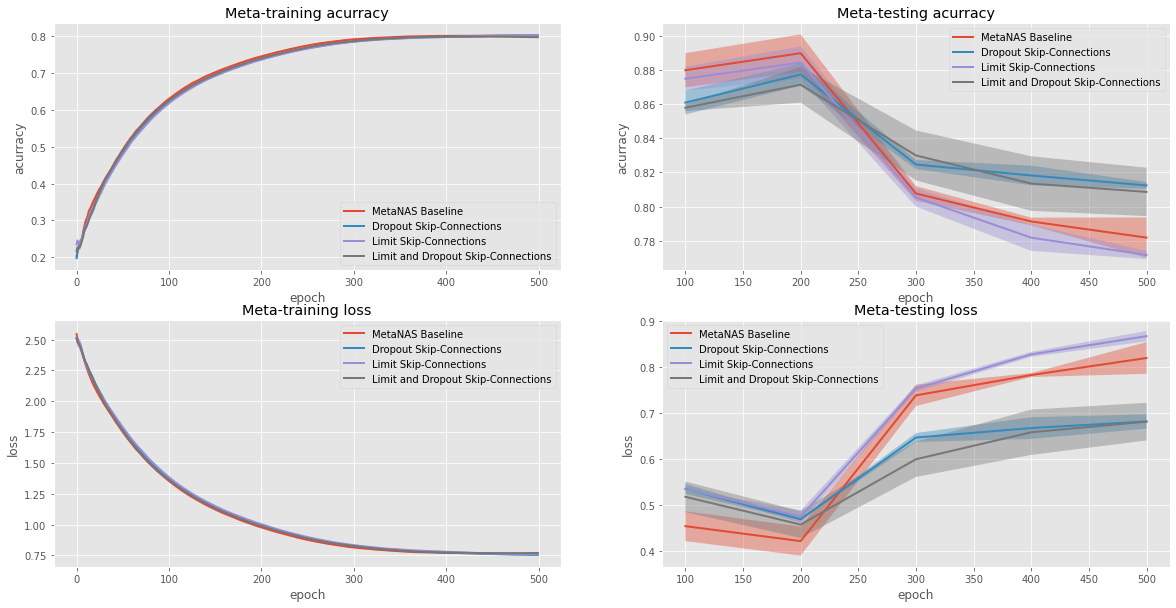

In [13]:
paths = [
    "omniglot_train_metanas",
    "omniglot_train_dropout",
    "omniglot_train_limit_sk", 
    "omniglot_train_dropout_limit_sk"
]

names = [
    "MetaNAS Baseline",
    "Dropout Skip-Connections",
    "Limit Skip-Connections",
    "Limit and Dropout Skip-Connections"
]


plot_accuracy_loss_multiple_seeds(base_path, paths, names, eval_every=[100, 100, 100, 100],
                   title="Ablation custom techniques, n=1, k=20, Omniglot dataset")

### DARTS- and PC-DARTS

| 1-shot, 20-way Omniglot |   |   |   |   |
|-------------------------|---|---|---|---|
| **Seed 0**              |   |   |   |   |
| DARTS-                  | x | x |   |   |
| PC-DARTS                | x |   | x |   |
| PC-DARTS-               | x |   |   | x |
| **Seed 1**              |   |   |   |   |
| DARTS-                  | x | x |   |   |
| PC-DARTS                | x |   | x |   |
| PC-DARTS-               | x |   |   | x |

current 0 experiment: MetaNAS
test_test_accu, mean and std: (78.18000144660473, 1.1800002664327636)
test_test_accu, mean and std: (78.18000144660473, 1.1800002664327636)
train_test_loss, mean and std: (76.386412627846, 0.9740424381196533)
train_test_loss, mean and std: (76.386412627846, 0.9740424381196533)
current 1 experiment: DARTS-
test_test_accu, mean and std: (74.54000129103662, 1.5800000369548783)
test_test_accu, mean and std: (74.54000129103662, 1.5800000369548783)
train_test_loss, mean and std: (82.28966777473687, 3.02414431035519)
train_test_loss, mean and std: (82.28966777473687, 3.02414431035519)
current 2 experiment: PC-DARTS-
test_test_accu, mean and std: (68.00000122189522, 0.4400000751018496)
test_test_accu, mean and std: (68.00000122189522, 0.4400000751018496)
train_test_loss, mean and std: (133.57066467940808, 1.3186134749650904)
train_test_loss, mean and std: (133.57066467940808, 1.3186134749650904)
current 3 experiment: DARTS-+Beta=0.7
test_test_accu, mean and std: (

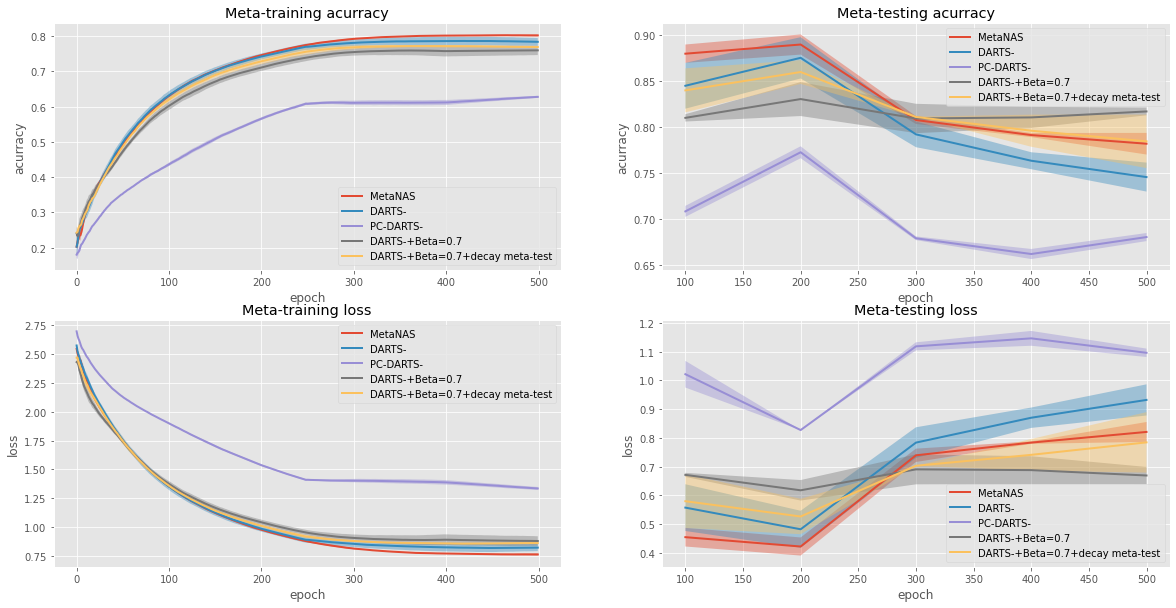

In [15]:
base_path_min = "/home/rob/Desktop/results/ablation/DARTS-/"

paths = [
    "omniglot_train_metanas",
    "omniglot_train_metanas_darts_min",
    "omniglot_train_metanas_pc_darts_min",
    "omniglot_train_metanas_darts_min_fixed_beta_0.7",
#     "omniglot_train_metanas_darts_min_fixed_beta_1.0",
    "omniglot_train_metanas_darts_min_fixed_beta_0.7_decay_test",
#     "omniglot_train_metanas_darts_min_fixed_beta_1.0_decay_test"
]

names = [
    "MetaNAS",
    "DARTS-",
    "PC-DARTS-",
    "DARTS-+Beta=0.7",
#     "DARTS-+Beta=1.0",
    "DARTS-+Beta=0.7+decay meta-test",
#     "DARTS-+Beta=1.0+decay meta-test"
]


plot_accuracy_loss_multiple_seeds(
    base_path_min, paths, names, eval_every=[100, 100, 100, 100, 100, 100, 100],
    title="Ablation custom techniques, n=1, k=20, Omniglot dataset")

# Best ablation comparisons

---

*Dropout skip-connection, limit skip-connection and alpha regularization*

current 0 experiment: MetaNAS
test_test_accu, mean and std: (78.46000146567822, 0.900000247359273)
test_test_accu, mean and std: (78.46000146567822, 0.900000247359273)
train_test_loss, mean and std: (75.22979692012072, 2.130658145844933)
train_test_loss, mean and std: (75.22979692012072, 2.130658145844933)
current 1 experiment: Limit skip-Conn+Dropout Skip-Conn
test_test_accu, mean and std: (80.86000119149685, 1.4199998348951297)
test_test_accu, mean and std: (80.86000119149685, 1.4199998348951297)
train_test_loss, mean and std: (77.0130635714531, 0.1815992662310677)
train_test_loss, mean and std: (77.0130635714531, 0.1815992662310677)
current 2 experiment: Limit skip-Conn+Dropout Skip-Conn+Alpha Reg+Cos Ann
test_test_accu, mean and std: (81.62000126838684, 0.21999993324280354)
test_test_accu, mean and std: (81.62000126838684, 0.21999993324280354)
train_test_loss, mean and std: (103.04697184294463, 3.6296925148367833)
train_test_loss, mean and std: (103.04697184294463, 3.62969251483678

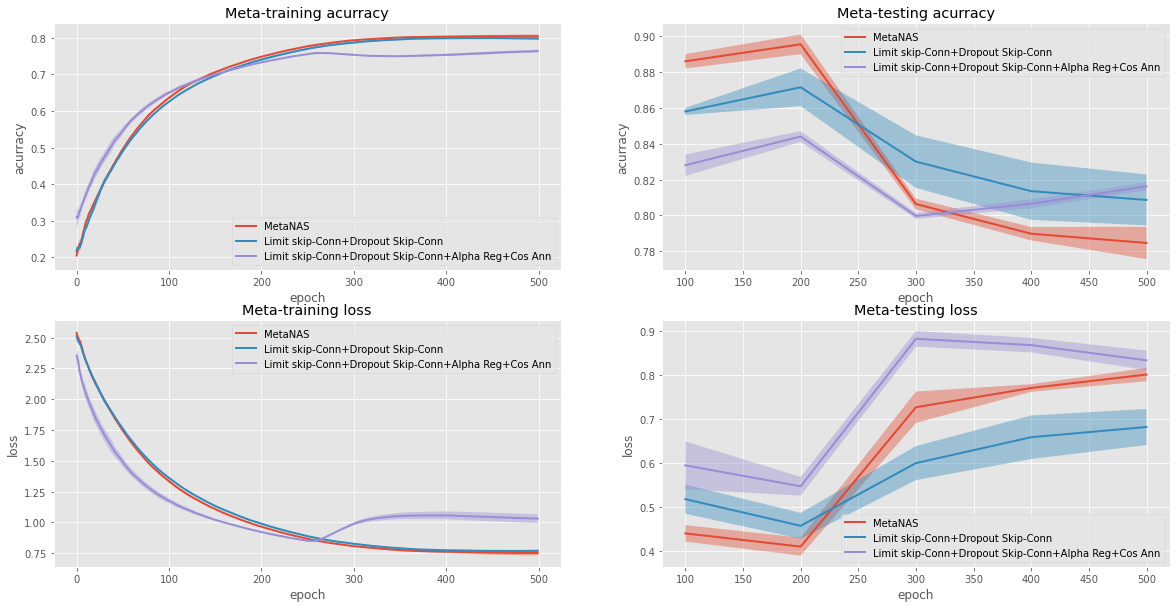

In [17]:
# 1-shot, 20-way Omniglot
base_path = "/home/rob/Desktop/results/ablation"

paths = [
    "omniglot_train_metanas_w_param",
    "omniglot_train_dropout_limit_sk", 
    "omniglot_train_alpha_power_cos_dropout_limit_sk_n1",
]

names = [
    "MetaNAS",
    "Limit skip-Conn+Dropout Skip-Conn",
    "Limit skip-Conn+Dropout Skip-Conn+Alpha Reg+Cos Ann",
]

plot_accuracy_loss_multiple_seeds(
    base_path, paths, names, eval_every=[100, 100, 100, 100, 100, 100],
    title="Baseline comparison, n=1, k=20, Omniglot dataset")

| 3-shot, 20-way Omniglot     |   |   |
|-----------------------------|---|---|
| **Seed 0**                  |   |   |
| MetaNAS (baseline)          | x |   |
| Best ablation               |   | - |
| **Seed 1**                  |   |   |
| MetaNAS (baseline)          | - |   |
| Best ablation               |   | - |

In [ ]:
# 3-shot, 20-way Omniglot
base_path = "/home/rob/Git/meta-fsl-nas/metanas/results/baseline"

paths = [
    "omniglot_train_metanas_n3",
    "omniglot_train_alpha_power_cos_dropout_limit_sk_n3",
#     "omniglot_train_dropout_limit_sk_n3",
]

names = [
    "MetaNAS",
    "Dropout+Limit SK+AlphaReg+PowerCosineAnnealing",
    "Dropout+limit SK"
]

plot_accuracy_loss_multiple_seeds(base_path, paths, names, eval_every=[100, 100, 100],
                   title="Baseline comparison, n=3, k=20, Omniglot dataset")

In [ ]:

base_path = "/home/rob/Git/meta-fsl-nas/metanas/results/transfer"

paths = [
    "triplemnist_train_n3",
    "temp_dropout_limit",
    "triplemnist_alpha_reg_cos_dropout_limit_sk_n3_250",
#     "triplemnist_dropout_limit_sk_n3_250",
]

names = [
    "MetaNAS",
    "MetaNAS+Limit and Dropout Skip-Connections",
    "MetaNAS+Limit and Dropout Skip-Connections+max-W+Power Cosine Annealing",
]

plot_accuracy_loss_multiple_seeds(base_path, paths, names, eval_every=[50, 50, 50],
                   title="Baseline comparison, n=3, k=20, TripleMNIST dataset")

## Transfer between datasets

---

| 3-shot, 20-way Transfer to TripleMNIST  |   |   |
|-----------------------------------------|---|---|
| **Seed 0**                              |   |   |
| MetaNAS (baseline)                      | - |   |
| Best ablation                           |   | - |
| **Seed 1**                              |   |   |
| MetaNAS (baseline)                      | - |   |
| Best ablation                           |   | - |


In [ ]:
paths_in = [
    "/home/rob/Git/meta-fsl-nas/metanas/results/baseline/omniglot_train_metanas_n3"
]

paths_out = [
#     "/home/rob/Git/meta-fsl-nas/metanas/results/baseline/triplemnist_train_metanas_n3",
#     "/home/rob/Git/meta-fsl-nas/metanas/results/transfer/triplemnist_train_n3",
    "/home/rob/Git/meta-fsl-nas/metanas/results/transfer/triplemnist_train_n3",
    "/home/rob/Git/meta-fsl-nas/metanas/results/transfer/triplemnist_dropout_limit_sk_n3_250"
]


matplotlib.rc('font', size = 20)

names = [
#     "MetaNAS test",
    "Baseline",
    for p in glob.glob(f"{path}/*/experiment.pickle"):
    "Limit and dropout skip-connections"
]

In [ ]:
paths_in = [
    "/home/rob/Git/meta-fsl-nas/metanas/results/transfer/triplemnist_train_n3",
    "/home/rob/Git/meta-fsl-nas/metanas/results/transfer/triplemnist_alpha_reg_cos_dropout_limit_sk_n3_250",
    "/home/rob/Git/meta-fsl-nas/metanas/results/transfer/triplemnist_dropout_limit_sk_n3_250"
]

paths_out = [
    "/home/rob/Git/meta-fsl-nas/metanas/results/transfer/triplemnist_train_n3",
    "/home/rob/Git/meta-fsl-nas/metanas/results/transfer/triplemnist_alpha_reg_cos_dropout_limit_sk_n3_250",
    "/home/rob/Git/meta-fsl-nas/metanas/results/transfer/triplemnist_dropout_limit_sk_n3_250"
]


matplotlib.rc('font', size = 12)

names = [
    "Baseline",
    "sadas",
    "Limit and dropout skip-connections"
]

plot_accuracy_loss_transfer_seeds(paths_in, paths_out, names,
                   title="")
# Transfer comparison, n=3, k=20, Omniglot to TripleMNIST

In [ ]:
def plot_accuracy_loss_transfer_seeds(paths_in, paths_out, labels, every=100, title=""):
    def get_results(path):
        result = []
        for p in glob.glob(f"{path}/*/experiment.pickle"):
            with (open(p, 'rb')) as f:
                res = pickle.load(f)
                result.append(res)
        return result

    def plot_line_training(ax, result, indice, label, y_label):
        train_acc = np.array([np.array(m[indice]) for m in result])
        
        train_acc_mean = train_acc.mean(axis=0)
        print(f"indice:{indice}, label:{label}, test-test acc:{train_acc_mean[-1]}")
            
        len_epoch = len(np.array(result[0][indice]))
        train_acc_mean = train_acc.mean(axis=0)
        train_acc_std = train_acc.std(axis=0)
        print(len_epoch)
        x_axis_meta = np.array(range(train_acc_mean.shape[0]))
        if indice == "test_test_accu":
            if len_epoch == 250:
                test_spacing = np.linspace(50, 250,
                                   num=5, 
                                   retstep=50, dtype=np.int32)[0]
            else:
                test_spacing = np.linspace(100, 500,
                                           num=5, 
                                           retstep=100, dtype=np.int32)[0]
            ax.plot(test_spacing[:len(result[0][indice])], train_acc_mean, lw = 2, alpha = 1, label=label)
            ax.set_title(f"Meta-testing {y_label}")

        if indice == "train_test_accu":
            ax.plot(x_axis_meta, train_acc_mean, lw = 2, alpha = 1, label=label)
                
            ax.set_title(f"Meta-training {y_label}")
        ax.fill_between(x_axis_meta, train_acc_mean - train_acc_std,
                        train_acc_mean + train_acc_std, alpha = 0.4)
        ax.set_xlabel("Epoch")
        ax.set_ylabel(y_label)
        
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, loc="best")
    
    results_in = [get_results(p) for p in paths_in]
    results_out = [get_results(p) for p in paths_out]
    
    fig, ax = plt.subplots(1, 2, figsize=(25, 8))
    plt.subplots_adjust(hspace=0.3)
    plt.suptitle(title, fontsize=14)
    
    y_label = "acurracy"
    
    for i, res_in in enumerate(results_in):
#         for j, indice in enumerate(["train_test_accu", "train_test_loss"]):
        plot_line_training(ax[0], res_in, "train_test_accu", labels[i], y_label=y_label)
        
    for i, res_out in enumerate(results_out):
#         for j, indice in enumerate(["train_test_accu", "train_test_loss"]):
        plot_line_training(ax[1], res_out, "test_test_accu", labels[i], y_label=y_label) #train_test_accu
    
    

paths_in = [
    "/home/rob/Git/meta-fsl-nas/metanas/results/ablation/omniglot_train_power_cosine"
]

paths_out = [
    "/home/rob/Git/meta-fsl-nas/metanas/results/ablation/omniglot_train_power_cosine"
]

names = [
    "MetaNAS test"
]

In [ ]:
def plot_single_run(paths, names, eval_every=5, title=""):
    results = []
    palette = sns.color_palette()
    palette

    for p in paths:
        with (open(p, 'rb')) as f:
            res = pickle.load(f)
            results.append(res)
    
    _, axes = plt.subplots(2, 2, figsize=(20, 10))
    plt.suptitle(title, fontsize=14)
    test_spacing = np.linspace(eval_every, len(results[0]['train_test_loss']),
                               num=len(results[0]['test_test_loss']), 
                               retstep=eval_every, dtype=np.int32)[0]

    for i, res in enumerate(results):
        color = palette.pop()
        axes[0, 0].set_title("Meta-training loss")
        axes[0, 0].plot(res['train_test_loss'], 'o-',
                        color=color, label=f"{names[i]} loss")
        axes[0, 0].set_ylabel("Loss")
        axes[0, 0].set_xlabel("Epochs")
        axes[0, 0].legend(loc="best")
        
        axes[0, 1].set_title("Meta-testing loss")
        axes[0, 1].plot(test_spacing[:len(res['test_test_loss'])],
                        res['test_test_loss'],  '^-', color=color,
                        label=f"{names[i]} loss")
        axes[0, 1].set_ylabel("Loss")
        axes[0, 1].set_xlabel("Epochs")
        axes[0, 1].legend(loc="best")

        axes[1, 0].set_title("Meta-training accuracy")
        axes[1, 0].plot(res['train_test_accu'], 'o-', color=color,
                        label=f"{names[i]} accuracy")
        axes[1, 0].set_ylabel("Accuracy")
        axes[1, 0].set_xlabel("Epochs")
        axes[1, 0].legend(loc="best")

        axes[1, 1].set_title("Meta-testing accuracy")
        axes[1, 1].plot(test_spacing[:len(res['test_test_accu'])],
                        res['test_test_accu'], '^-', color=color,
                        label=f"{names[i]} accuracy")
        axes[1, 1].set_ylabel("Accuracy")
        axes[1, 1].set_xlabel("Epochs")
        axes[1, 1].legend(loc="best")

In [ ]:
paths = [ "/home/rob/Desktop/thesis/ablation/omniglot_train_limit_sk/omniglot_train_limit_sk_1/experiment.pickle"]
names = ["MetaNAS"]

plot_single_run(paths, names, title="MetaNAS, n=1, k=20, Omniglot dataset")

In [ ]:
base_path = "/home/rob/Git/meta-fsl-nas/metanas/results/agent/"

paths = [
    "triplemnist_metanas_ppo_agent_metad2a"
]

names = [
    "MetaNAS+RL agent"]



plot_accuracy_loss_multiple_seeds(base_path, paths, names, eval_every=[5],
                   title="MetaNAS+RL agent, n=1, k=20, TripleMNIST dataset")

In [ ]:
# Custom experimental scripts

base_path = "/home/rob/Desktop/results/test/"

paths = [
    "omniglot_train_metanas_epoch",
#     "omniglot_train_metanas_less_adap",
    "omniglot_train_metanas_half_adap"
]

names = [
    "2000 total epochs, 1000 warm-up epochs",
#     "Less adaption steps, 15 DARTS adaptation meta-training and meta-testing steps",
    "0.5 - adaption param, 25 weights & alpha training steps, 25 weights training steps"
]

eval_interval = [100, 100]

plot_accuracy_loss_multiple_seeds(base_path, paths, names, eval_every=eval_interval,
                   title="Ablation P-DARTS study, n=1, k=20, Omniglot dataset")

In [ ]:
def plot_genotype(path, eval_every):
    with (open(path, 'rb')) as f:
        res = pickle.load(f)

        plot(res['meta_genotype'].normal, 'normal', 'normal cell')
        plot(res['meta_genotype'].reduce, 'reduce', 'reduce cell')

plot_genotype(
    "/home/rob/Git/meta-fsl-nas/metanas/results/ablation/omniglot_train_alpha_reg_power_cosine/omniglot_train_alpha_reg_power_cosine_1/experiment.pickle",
    100)